In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import copy

In [2]:
data1= pd.read_excel("Adherencia.xlsx")
data2= pd.read_excel('Antecedentes_patologicos.xlsx')
data3= pd.read_excel('Hospitalizaciones.xlsx')

# Initial overview

In [3]:
print(data1.info())#adherencia
data1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds_identificacion       5274 non-null   int64         
 1   FE_ENTREVISTA           5274 non-null   datetime64[ns]
 2   Morisky_Green           5261 non-null   object        
 3   Smaq1                   5261 non-null   object        
 4   Smaq2                   5261 non-null   object        
 5   Espa                    5261 non-null   object        
 6   nm_espa                 5265 non-null   float64       
 7   Cualitativo_ponderado   5261 non-null   object        
 8   Cuantitativo_ponderado  5261 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 371.0+ KB
None


,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cualitativo_ponderado,Cuantitativo_ponderado
0,1101180,2012-04-24,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,4.0,NO ADHERENTE,95-100%
1,1101180,2012-11-26,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
2,529410,2012-04-19,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
3,979605,2013-03-04,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
4,1198956,2012-05-16,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
...,...,...,...,...,...,...,...,...,...
5269,1335419,2020-05-20,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5270,1519090,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5271,628557,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5272,1970331,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%


In [4]:
print(data2.info())#Antecedentes_patologicos
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DS_IDENTIFICACION  2086 non-null   int64         
 1   EPS                2086 non-null   object        
 2   FE_ACTUALIZA       2086 non-null   datetime64[ns]
 3   FE_INICIO          2034 non-null   datetime64[ns]
 4   FE_FIN             148 non-null    datetime64[ns]
 5   DS_OBSERVACIONES   58 non-null     object        
 6   Diagnostico        2085 non-null   object        
 7   CodDiagnostico     2085 non-null   object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 130.5+ KB
None


,DS_IDENTIFICACION,EPS,FE_ACTUALIZA,FE_INICIO,FE_FIN,DS_OBSERVACIONES,Diagnostico,CodDiagnostico
0,653834,EPS/SURA,2010-10-10,2010-10-09,NaT,NaN,TRASPLANTE DE CORAZON,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,OTRAS DERMATITIS ATOPICAS,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,"RINITIS ALERGICA, NO ESPECIFICADA",J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,NaT,NaN,ASMA PREDOMINANTEMENTE ALERGICA,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,CHOQUE ANAFILACTICO DEBIDO A REACCION ADVERSA ...,T780
...,...,...,...,...,...,...,...,...
2081,1370054,EPS/SURA,2020-03-24,2020-03-24,NaT,NaN,URTICARIA ALERGICA,L500
2082,1370054,EPS/SURA,2020-04-28,2020-04-28,NaT,NaN,URTICARIA IDIOPATICA,L501
2083,1370148,EPS/SURA,2020-03-27,2017-03-18,NaT,NaN,"URTICARIA, NO ESPECIFICADA",L509
2084,1311280,EPS/SURA,2020-03-27,2020-03-20,NaT,NaN,URTICARIA IDIOPATICA,L501


In [5]:
print(data3.info())#Hospitalizaciones
data3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id                                1750 non-null   int64 
 1   Sexo                              1750 non-null   object
 2   EDAD (Años)                       1750 non-null   int64 
 3   Id Diagnostico Egreso             1705 non-null   object
 4   Descripción diagnostico (egreso)  1750 non-null   object
 5   Dias Uci                          1750 non-null   int64 
 6   Dias Uce                          1750 non-null   int64 
 7   Días de Estancia (Calculada)      1750 non-null   int64 
 8   Fecha Ingreso                     1750 non-null   int64 
 9   Fecha Egreso                      1750 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 136.8+ KB
None


,Id,Sexo,EDAD (Años),Id Diagnostico Egreso,Descripción diagnostico (egreso),Dias Uci,Dias Uce,Días de Estancia (Calculada),Fecha Ingreso,Fecha Egreso
0,1381384,Femenino,43,R060,DISNEA,0,0,0,43973,43973
1,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
2,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
3,978163,Masculino,12,E848,FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES,0,0,0,43608,43608
4,1140753,Masculino,31,J459,"ASMA, NO ESPECIFICADA",0,0,0,43334,43334
...,...,...,...,...,...,...,...,...,...,...
1745,1772651,Femenino,67,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EX...,0,1,13,42774,42787
1746,664514,Femenino,36,J459,"ASMA, NO ESPECIFICADA",0,0,8,42779,42787
1747,1391509,Femenino,4,J459,"ASMA, NO ESPECIFICADA",0,0,2,42785,42787
1748,1339118,Masculino,81,J459,"ASMA, NO ESPECIFICADA",0,0,9,42785,42794


In [6]:
Adher = copy.deepcopy(data1)  
Pato  = copy.deepcopy(data2)  
Hosp  = copy.deepcopy(data3)  

-------------------------

# 1 . Adherencia

In [7]:
###### Rename the columns ############

Adher.rename(columns={'ds_identificacion':'id',
                         'FE_ENTREVISTA':'fe_entrevista',
                          'Morisky_Green':'morisky_green',
                          'Smaq1':'smaq1',
                          'Smaq2':'smaq2',
                          'Espa':'espa',
                          'Cualitativo_ponderado':'cualitativo_ponderado',
                          'Cuantitativo_ponderado': 'cuantitativo_ponderado'
                      }, 
            inplace=True)

##### Set date as pandas type ########

Adher['fe_entrevista']=pd.to_datetime(Adher['fe_entrevista'])
Adher.sort_values(by=['fe_entrevista'],ascending= True, inplace=True)

#### Drop duplicate rows ########

Adher.drop_duplicates(keep='first',inplace=True)
Adher.reset_index(drop= True, inplace=True)
Adher

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado
0,529410,2012-04-19,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
1,1101180,2012-04-24,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,4.0,NO ADHERENTE,95-100%
2,1053118,2012-05-03,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
3,1198956,2012-05-16,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
4,605968,2012-05-17,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,5.0,NO ADHERENTE,95-100%
...,...,...,...,...,...,...,...,...,...
5222,1126622,2020-05-20,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5223,628557,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5224,1970331,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
5225,1519090,2020-05-21,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%


In [8]:
print('Number of unique "ds_identificacion" : ', Adher['id'].unique().size )
print('Range of data: From 10/JAN/2012 to 05/DEC/2020')

Number of unique "ds_identificacion" :  849
Range of data: From 10/JAN/2012 to 05/DEC/2020


In [9]:
df1 = Adher[Adher.isna().any(axis=1)]
df1

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado
83,667026,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,716377,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,832593,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1491934,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,514102,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,845676,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,846434,2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689,767551,2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,1898392,2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2557,1505589,2017-09-12,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [10]:
Adher['morisky_green'].unique()

array(['NO ADHERENTE', 'ADHERENTE', 'NO APLICA', nan], dtype=object)

In [11]:
#Replace 'No aplica' for nan
#Reevaluate rows with nan
Adher.replace('NO APLICA', np.nan, inplace=True)
df1 = Adher[Adher.isna().any(axis=1)]  
df1 #Show dataframe with missing values.

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado
81,852244,2013-04-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN
83,667026,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,716377,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,832593,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1491934,2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4896,843484,2020-02-07,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4898,709830,2020-02-11,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4994,1715733,2020-03-13,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5008,1311280,2020-03-20,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [12]:
missed_appointments = df1; #Rename missed appointments
print(df1['morisky_green'].unique())
print(df1['smaq1'].unique())
print(df1['smaq2'].unique())
print(df1['espa'].unique())
print(df1['nm_espa'].unique())
print(df1['cualitativo_ponderado'].unique())
print(df1['cuantitativo_ponderado'].unique())

[nan]
[nan]
[nan]
[nan]
[ 0. nan]
[nan]
[nan]


In [13]:
Adher=Adher.dropna(subset=['morisky_green','smaq1','smaq2','espa','nm_espa','cualitativo_ponderado','cuantitativo_ponderado'])

In [14]:
Adher1 = copy.deepcopy(Adher) 
Adher1.set_index(['id', 'fe_entrevista'], inplace=True)
Adher1.sort_index(inplace=True)
Adher1.head(30)

morisky_green         smaq1    smaq2          espa  \
id     fe_entrevista                                                      
500547 2016-07-11        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2019-03-14        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2019-10-11        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2019-12-09        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2020-01-16        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2020-03-25        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2020-05-08        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
500588 2019-04-26        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
502989 2014-08-22     NO ADHERENTE  NO ADHERENTE   64-84%     ADHERENTE   
       2014-10-28     NO ADHERENTE  NO ADHERENTE   64-84%  NO ADHERENTE   
       2014-11-21        ADHERENTE     ADHERENTE  95-100%  NO ADHERENTE   
       2015-01-07     NO ADHERENTE     ADHERENTE   85-94%  NO ADHERENTE   
       2015-01-14        ADHERENTE     ADHERENTE   85-94%  NO ADHERENTE   
       2015-06-25        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2016-01-12     NO ADHERENTE  NO ADHERENTE   85-94%     ADHERENTE   
       2016-01-15        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2017-01-03     NO ADHERENTE  NO ADHERENTE   85-94%     ADHERENTE   
       2017-03-21        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2017-07-10        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2017-08-08        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2018-10-03     NO ADHERENTE  NO ADHERENTE  95-100%  NO ADHERENTE   
       2019-02-08        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
506808 2013-05-08        ADHERENTE     ADHERENTE  95-100%  NO ADHERENTE   
       2013-05-24        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2013-09-11        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2013-10-02        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2014-09-30        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2014-12-16        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2015-02-05        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   
       2015-02-14        ADHERENTE     ADHERENTE  95-100%     ADHERENTE   

                      nm_espa cualitativo_ponderado cuantitativo_ponderado  
id     fe_entrevista                                                        
500547 2016-07-11         6.0             ADHERENTE                95-100%  
       2019-03-14         6.0             ADHERENTE                95-100%  
       2019-10-11         6.0             ADHERENTE                95-100%  
       2019-12-09         6.0             ADHERENTE                95-100%  
       2020-01-16         6.0             ADHERENTE                95-100%  
       2020-03-25         6.0             ADHERENTE                95-100%  
       2020-05-08         5.0             ADHERENTE                95-100%  
500588 2019-04-26         6.0             ADHERENTE                95-100%  
502989 2014-08-22         5.0          NO ADHERENTE                 64-84%  
       2014-10-28         5.0          NO ADHERENTE                 64-84%  
       2014-11-21         5.0          NO ADHERENTE                95-100%  
       2015-01-07         5.0          NO ADHERENTE                 85-94%  
       2015-01-14         5.0          NO ADHERENTE                 85-94%  
       2015-06-25         6.0             ADHERENTE                95-100%  
       2016-01-12         6.0          NO ADHERENTE                 85-94%  
       2016-01-15         6.0             ADHERENTE                95-100%  
       2017-01-03         6.0          NO ADHERENTE                 85-94%  
       2017-03-21         6.0             ADHERENTE                95-100%  
       2017-07-10         6.0             ADHERENTE                95-100%  
   

-----------------------

# 2. Patologia

In [15]:
###### Rename the columns ############
Pato.rename(columns={'DS_IDENTIFICACION':'id',
                         'EPS':'eps',
                          'FE_ACTUALIZA':'fe_actualizada',
                          'FE_INICIO':'fe_inicio',
                          'FE_FIN':'fe_fin',
                          'DS_OBSERVACIONES':'ds_observaciones',
                          'Diagnostico':'diagnostico',
                          'CodDiagnostico': 'cod_diagnostico'
                      }, 
            inplace=True)

##### Set date as pandas type ########
Pato['fe_actualizada']=pd.to_datetime(Pato['fe_actualizada'])
Pato['fe_inicio']=pd.to_datetime(Pato['fe_inicio'])
Pato['fe_fin']=pd.to_datetime(Pato['fe_fin'])

#### Drop duplicate rows ########
Pato.drop_duplicates(keep='first',inplace=True)
Pato.reset_index(drop= True, inplace=True)

In [16]:
#Pato.sort_values(by=['id'],ascending= True, inplace=True)
#Pato.head(30)

In [17]:
print(Pato['eps'].unique())
print(Pato['ds_observaciones'].unique().size)

['EPS/SURA' 'COOMEVA' 'SAVIA SALUD EPS' 'NUEVA EPS' 'PARTICULAR']
53


In [18]:
Pato.replace('NaT', np.nan, inplace=True)

In [19]:
df2 = Pato[Pato.isna().any(axis=1)]  
df2 #Show dataframe with missing values.

,id,eps,fe_actualizada,fe_inicio,fe_fin,ds_observaciones,diagnostico,cod_diagnostico
0,653834,EPS/SURA,2010-10-10,2010-10-09,NaT,NaN,TRASPLANTE DE CORAZON,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,OTRAS DERMATITIS ATOPICAS,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,"RINITIS ALERGICA, NO ESPECIFICADA",J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,NaT,NaN,ASMA PREDOMINANTEMENTE ALERGICA,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,CHOQUE ANAFILACTICO DEBIDO A REACCION ADVERSA ...,T780
...,...,...,...,...,...,...,...,...
2066,1370054,EPS/SURA,2020-03-24,2020-03-24,NaT,NaN,URTICARIA ALERGICA,L500
2067,1370054,EPS/SURA,2020-04-28,2020-04-28,NaT,NaN,URTICARIA IDIOPATICA,L501
2068,1370148,EPS/SURA,2020-03-27,2017-03-18,NaT,NaN,"URTICARIA, NO ESPECIFICADA",L509
2069,1311280,EPS/SURA,2020-03-27,2020-03-20,NaT,NaN,URTICARIA IDIOPATICA,L501


In [20]:
df22 = Pato.dropna(subset=['ds_observaciones'])
print(df22.shape)
print(df22['ds_observaciones'].unique)
print(Pato['diagnostico'].unique().shape)
print(Pato['cod_diagnostico'].unique().shape)
Diccionario_diagnosticos_Pato = Pato.set_index('diagnostico')['cod_diagnostico'].to_dict();

(58, 8)
<bound method Series.unique of 34                                   hipogamaglobulinemia
37                             inmunodeficiencia primaria
38                   aspergilosis entto y bronquiectasias
40      lapaciente a presentado varias neumonias ultim...
58                                            HACE 7 AÑOS
63       EVALUACION DE LOS MEDICOS EN EL ISS TENIA UNA...
69      Chorro grueso. FMD: 4-5 N: 0-1. Esta conforme ...
118                                          "desde niña"
120                                        "toda la vida"
150     Pcte con cuadro de hipoacusia bilateral , mas ...
185                                  recien diagnosticado
186                                    se desconoce fecha
220     MAMOGRAFÍA QUE REPORTA" IMAGEN REDONDEADA < 1|...
231                                    SE DESCONOCE FECHA
238     uROCULTIVO Y ANTIBIOGRAMA CINTILLA DE ORINA CO...
243     CONTROLADA MUCHOS AÑOS, PERO DURANTE LOS ULTIM...
260                        DIAGNO

In [21]:
Pato.drop(columns=['diagnostico', 'ds_observaciones', 'fe_fin'], inplace=True)

In [22]:
Pato

,id,eps,fe_actualizada,fe_inicio,cod_diagnostico
0,653834,EPS/SURA,2010-10-10,2010-10-09,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,T780
...,...,...,...,...,...
2066,1370054,EPS/SURA,2020-03-24,2020-03-24,L500
2067,1370054,EPS/SURA,2020-04-28,2020-04-28,L501
2068,1370148,EPS/SURA,2020-03-27,2017-03-18,L509
2069,1311280,EPS/SURA,2020-03-27,2020-03-20,L501


In [23]:
#hist = Pato[['cod_diagnostico']].hist
#hist
#sns.distplot(Pato["cod_diagnostico"].value_counts(), bins=(10), kde=False)

#hist(bins=(len(Pato['cod_diagnostico'].unique())))
#len(Pato['cod_diagnostico'].unique())

Pato['cod_diagnostico'].value_counts().head(10)

J450    386
J459    291
L509    155
I10X     79
J304     72
L501     69
L500     68
L508     65
J449     49
J458     42
Name: cod_diagnostico, dtype: int64

In [24]:
Pato1 = copy.deepcopy(Pato) 
Pato1.set_index(['id', 'fe_inicio'], inplace=True)
Pato1.sort_index(inplace=True)
Pato1.head(30)

eps fe_actualizada cod_diagnostico
id     fe_inicio                                                 
500547 2014-10-22         EPS/SURA     2016-08-04            M545
       2015-05-05         EPS/SURA     2019-03-14            L509
500588 2006-01-10         EPS/SURA     2017-08-08            J450
       2006-10-10         EPS/SURA     2017-08-08            J303
502989 2000-08-03         EPS/SURA     2014-08-22            J450
       2002-08-01         EPS/SURA     2014-08-22            H540
506808 2010-09-10         EPS/SURA     2013-05-08            J450
       2011-10-10         EPS/SURA     2013-05-08            J304
       2011-11-01         EPS/SURA     2013-05-08            H108
       2016-05-31         EPS/SURA     2016-06-07            D809
512938 2005-03-24         EPS/SURA     2016-03-10            J303
       2012-03-12         EPS/SURA     2016-03-10            J450
514102 2006-03-01         EPS/SURA     2013-03-14            J458
524006 2002-10-07         EPS/SURA     2015-01-05            J459
       2007-09-01         EPS/SURA     2015-09-10            J449
       2015-09-10         EPS/SURA     2015-09-10            E103
       2015-09-10         EPS/SURA     2015-09-10            I10X
524902 2018-04-24         EPS/SURA     2018-04-24            L509
       2018-04-24         EPS/SURA     2018-04-24            L501
525295 2019-06-11         EPS/SURA     2019-06-11            J459
525540 2012-02-09         EPS/SURA     2019-12-09            J459
526049 2006-12-15         EPS/SURA     2014-08-26            J450
       2014-08-08         EPS/SURA     2016-12-20            J459
527763 2019-07-16  SAVIA SALUD EPS     2019-07-16            L509
       2020-01-10  SAVIA SALUD EPS     2020-02-29            M818
528384 2015-06-18         EPS/SURA     2017-08-10            J450
529410 2007-06-07         EPS/SURA     2011-08-03            J303
       2008-01-03         EPS/SURA     2011-08-03            J451
       2010-09-01         EPS/SURA     2011-08-03            J304
       2010-10-13         EPS/SURA     2011-08-03            J010

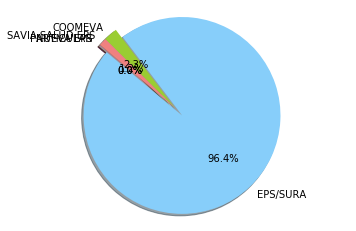

In [92]:
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'gold','m']
explode = (0.1, 0, 0, 0, 0) 
plt.pie(Pato['eps'].value_counts(),labels=Pato['eps'].unique(), explode = explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140);
plt.axis('equal')
plt.show()

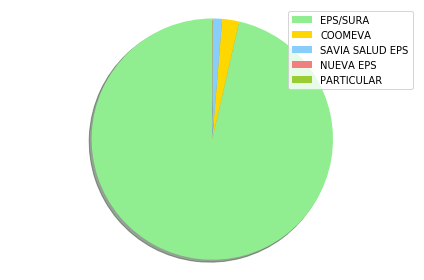

In [108]:
colors = ['lightgreen', 'gold', 'lightskyblue', 'lightcoral', 'yellowgreen'];
labels=Pato['eps'].unique();
patches, texts = plt.pie(Pato['eps'].value_counts(), colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

-----------------------

# 3. Hospitalizaciones

In [25]:
Hosp  = copy.deepcopy(data3) 

###### Rename the columns ############
Hosp.rename(columns={'Id':'id',
                     'EDAD (Años)':'edad',
                     'Sexo':'sexo',
                         'Id Diagnostico Egreso':'cod_diagnostico',
                          'Descripción diagnostico (egreso)':'diagnostico',
                          'Días de Estancia (Calculada)':'dias_total',
                          'Dias Uci':'dias_uci',
                          'Dias Uce':'dias_uce',
                          'Fecha Ingreso':'fe_ingreso',
                          'Fecha Egreso': 'fe_egreso'
                      }, 
            inplace=True)

##### Set date as pandas type ########
import xlrd
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
Hosp['fe_ingreso'] = pd.to_datetime(Hosp['fe_ingreso'].apply(read_date), errors='coerce');
Hosp['fe_egreso'] = pd.to_datetime(Hosp['fe_egreso'].apply(read_date), errors='coerce');

#### Drop duplicate rows ########
Hosp.drop_duplicates(keep='first',inplace=True)
Hosp.reset_index(drop= True, inplace=True)

In [26]:
print(Hosp['diagnostico'].unique().shape[0])
print((Hosp['cod_diagnostico'].unique().shape[0]))

327
317


In [27]:
#Fill all the missing values in cod_diagnostico with their corresponding code from varius tables.
Hosp.loc[Hosp.diagnostico == 'INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFICACIÓN', 'cod_diagnostico'] = "I219"
Hosp.loc[Hosp.diagnostico == 'ASMA, NO ESPECIFICADA', 'cod_diagnostico'] = "J459"
Hosp.loc[Hosp.diagnostico == 'APENDICITIS AGUDA, NO ESPECIFICADA', 'cod_diagnostico' ] = "k359" 
Hosp.loc[Hosp.diagnostico == 'NEUMONÍA, NO ESPECIFICADA', 'cod_diagnostico' ] = "J189" 
Hosp.loc[Hosp.diagnostico == 'NEUMONÍA BACTERIANA, NO ESPECIFICADA', 'cod_diagnostico'] = "J159" 
Hosp.loc[Hosp.diagnostico == 'ESTADO ASMÁTICO', 'cod_diagnostico' ] = "J46X" 
Hosp.loc[Hosp.diagnostico == 'ASMA NO ALÉRGICA', 'cod_diagnostico' ] = "J451" 
Hosp.loc[Hosp.diagnostico == 'INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFICADO', 'cod_diagnostico' ] = "N390" 
Hosp.loc[Hosp.diagnostico == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EXACERBACIÓN AGUDA, NO ESPECIFICADA', 'cod_diagnostico'] = "J441" 
Hosp.loc[Hosp.diagnostico == 'SÍNDROME DE DIFICULTAD RESPIRATORIA DEL ADULTO', 'cod_diagnostico'] = "J80X" 
Hosp.loc[Hosp.diagnostico == 'CELULITIS DE OTROS SITIOS', 'cod_diagnostico' ] = "L038" 
Hosp.loc[Hosp.diagnostico == 'BRONQUIECTASIA',  'cod_diagnostico' ] = "J47X" 
Hosp.loc[Hosp.diagnostico == 'TUMOR MALIGNO DEL COLON, PARTE NO ESPECIFICADA',  'cod_diagnostico' ] = "C189" 
Hosp.loc[Hosp.diagnostico == 'ALERGIA NO ESPECIFICADA',  'cod_diagnostico' ] = "T784" 
Hosp.loc[Hosp.diagnostico == 'PARO RESPIRATORIO',  'cod_diagnostico'] = "R092" 
Hosp.loc[Hosp.diagnostico == 'DISNEA',  'cod_diagnostico' ] = "R060" 
Hosp.loc[Hosp.diagnostico == 'OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS', 'cod_diagnostico' ] = "R104" 
Hosp.loc[Hosp.diagnostico == 'DIABETES MELLITUS INSULINODEPENDIENTE, CON COMPLICACIONES NO ESPECIFICADAS', 'cod_diagnostico' ] = "E108" 
Hosp.loc[Hosp.diagnostico == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON INFECCIÓN AGUDA DE LAS VÍAS RESPIRATORIAS INFERIORES', 'cod_diagnostico' ] = "J440" 
Hosp.loc[Hosp.diagnostico == 'HEMOPTISIS', 'cod_diagnostico' ] = "HEM" 
Hosp.loc[Hosp.diagnostico == 'ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, NO ESPECIFICADA', 'cod_diagnostico' ] = "J449" 

#Diccionario_diagnosticos  #This dictionary has the info of 'diagnostico' and 'cod_diagnostico', these two columns are basically the same.
Diccionario_diagnosticos_Hosp = Hosp.set_index('diagnostico')['cod_diagnostico'].to_dict();
#Diccionario_diagnosticos_Pato = Pato.set_index('diagnostico')['cod_diagnostico'].to_dict(); #<--- have to do this before dropping the column

### z = {**x, **y}
###The desired result is to get a new dictionary (z) with the values merged, and the second dictionary's values (y) overwriting those from the first (x).
#I have a dictionary with the codes for 'diagnostico'.
Dicc_merge= {**Diccionario_diagnosticos_Hosp, **Diccionario_diagnosticos_Pato }
Dicc_merge;


In [28]:
df4 = Hosp[Hosp.isna().any(axis=1)]  
print('show dataframe with missing values.')
df4
#miss_bool = Hosp.cod_diagnostico.isnull() 
#Hosp.loc[miss_bool, 'cod_diagnostico']

show dataframe with missing values.


,id,sexo,edad,cod_diagnostico,diagnostico,dias_uci,dias_uce,dias_total,fe_ingreso,fe_egreso


In [29]:
print('Number of unique values in diagnostico', Hosp['diagnostico'].unique().shape[0])
print('Number of unique values in cod_diagnostico',(Hosp['cod_diagnostico'].unique().shape[0]))
reverse_dict = {}
for key, value in Diccionario_diagnosticos_Hosp.items():
    try:reverse_dict[value].append(key)
    except:reverse_dict[value] = [key]
reverse_dict;
[value for key, value in reverse_dict.items() if len(value) > 1]; ##Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.
print('Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.')

Number of unique values in diagnostico 327
Number of unique values in cod_diagnostico 312
Some diagnosticos have different special characters but ultimately have the same cod_diagnostico.


In [30]:
reverse_dict = {}
for key, value in Dicc_merge.items():
    try:reverse_dict[value].append(key)
    except:reverse_dict[value] = [key]
reverse_dict;
[value for key, value in reverse_dict.items() if len(value) > 1]; #Same thing happens with the merged dictionary.

In [31]:
Hosp.drop(columns=['diagnostico'], inplace=True)

In [32]:
Hosp['sexo']=Hosp['sexo'].astype('category');
Hosp['cod_diagnostico']=Hosp['cod_diagnostico'].astype('category');
Hosp

,id,sexo,edad,cod_diagnostico,dias_uci,dias_uce,dias_total,fe_ingreso,fe_egreso
0,1381384,Femenino,43,R060,0,0,0,2020-05-22,2020-05-22
1,1118363,Masculino,6,R060,0,0,0,2020-01-02,2020-01-02
2,978163,Masculino,12,E848,0,0,0,2019-05-23,2019-05-23
3,1140753,Masculino,31,J459,0,0,0,2018-08-22,2018-08-22
4,1226479,Femenino,19,k359,0,0,0,2018-07-03,2018-07-03
...,...,...,...,...,...,...,...,...,...
1446,948868,Femenino,43,J46X,0,0,147,2018-11-02,2019-03-29
1447,885255,Masculino,67,J159,0,0,19,2017-01-16,2017-02-04
1448,1772651,Femenino,67,J441,0,1,13,2017-02-08,2017-02-21
1449,664514,Femenino,36,J459,0,0,8,2017-02-13,2017-02-21


In [33]:
print(Hosp['edad'].unique())
print('Number of unique values: ',len(Hosp['edad'].unique()))
# I see a some age values that look like a mistake, they are not so many so I decided to ditch them.

[  43    6   12   31   19   80   53   49   78   56   58   61   55   29
   38   27   32   26   64   52   45   51   39   24   28   25   35   57
   71   73   74   60   30   47   54   40   36   48   66   50   34   44
   46   37   41   33   62   59   65   16   18    9    8   14    2    5
    0    3   23   10    1   11   21   20   17 2660   82   79   70   63
   67   72   68   75    7    4   15   22 2679   77   69   42   13   81
   76   93 2136   83]
Number of unique values:  88


In [34]:
# Get names of indexes for which column Age has value over 110.
indexNames = Hosp[ Hosp['edad'] > 110 ].index
# Delete these row indexes from dataFrame
Hosp.drop(indexNames , inplace=True)
Hosp['edad'].describe()

count    1445.000000
mean       37.728028
std        22.012212
min         0.000000
25%        20.000000
50%        39.000000
75%        56.000000
max        93.000000
Name: edad, dtype: float64

In [35]:
Hosp

,id,sexo,edad,cod_diagnostico,dias_uci,dias_uce,dias_total,fe_ingreso,fe_egreso
0,1381384,Femenino,43,R060,0,0,0,2020-05-22,2020-05-22
1,1118363,Masculino,6,R060,0,0,0,2020-01-02,2020-01-02
2,978163,Masculino,12,E848,0,0,0,2019-05-23,2019-05-23
3,1140753,Masculino,31,J459,0,0,0,2018-08-22,2018-08-22
4,1226479,Femenino,19,k359,0,0,0,2018-07-03,2018-07-03
...,...,...,...,...,...,...,...,...,...
1446,948868,Femenino,43,J46X,0,0,147,2018-11-02,2019-03-29
1447,885255,Masculino,67,J159,0,0,19,2017-01-16,2017-02-04
1448,1772651,Femenino,67,J441,0,1,13,2017-02-08,2017-02-21
1449,664514,Femenino,36,J459,0,0,8,2017-02-13,2017-02-21


In [36]:
Hosp1 = copy.deepcopy(Hosp) 
Hosp1.set_index(['edad', 'id'], inplace=True)
Hosp1.sort_index(inplace=True)
Hosp1.head(30)
#Hosp1.reset_index(level=1)

sexo cod_diagnostico  dias_uci  dias_uce  dias_total  \
edad id                                                                   
0    596891   Masculino            P599         0         0           2   
     967262   Masculino            P073         0         0           1   
     967262   Masculino            P220         7         1          11   
     1022147   Femenino            P073         0        16          22   
     1215602  Masculino            P073         3         3           7   
     1500207  Masculino            R060         0         1           2   
     1500207  Masculino            Q251         2         2           6   
     1548056   Femenino            P073         0         0           1   
     1548056   Femenino            P229         2         0           2   
     1548056   Femenino            P073         6         4          11   
1    506808   Masculino            J459         0         0           3   
     596891   Masculino            L048         0         0           8   
     1088205   Femenino            J46X         0         0           3   
     1118363  Masculino            J219         0         0           4   
     1391509   Femenino            J189         0         0           4   
     1391509   Femenino            Z111         0         0           7   
     1500207  Masculino            N390         0         0           6   
     1538712   Femenino            J46X         0         0           1   
     1538712   Femenino            J180         2         1           8   
2    506808   Masculino            J189         0         0           4   
     506808   Masculino            J459         0         0           5   
     535255    Femenino            J180         0         0           1   
     535255    Femenino            J159         0         0           6   
     535255    Femenino            J324         0         0          22   
     653834   Masculino            B002         0         0           3   
     967262   Masculino            J459         0         0           6   
     1022147   Femenino            J180         0         0           4   
     1088205   Femenino            J459         0         0           1   
     1118363  Masculino            J459         0         0           2   
     1118363  Masculino            J451         0         0           2   

             fe_ingreso  fe_egreso  
edad id                             
0    596891  2009-10-08 2009-10-10  
     967262  2009-05-18 2009-05-19  
     967262  2009-05-07 2009-05-18  
     1022147 2009-06-08 2009-06-30  
     1215602 2014-11-04 2014-11-11  
     1500207 2008-01-13 2008-01-15  
     1500207 2008-01-02 2008-01-08  
     1548056 2011-09-13 2011-09-14  
     1548056 2011-08-27 2011-08-29  
     1548056 2011-08-29 2011-09-09  
1    506808  2010-07-17 2010-07-20  
     596891  2010-10-14 2010-10-22  
     1088205 2011-04-07 2011-04-10  
     1118363 2014-11-15 2014-11-19  
     1391509 2014-07-26 2014-07-30  
     1391509 2014-02-27 2014-03-06  
     1500207 2009-06-27 2009-07-03  
     1538712 2010-11-29 2010-11-30  
     1538712 2010-11-30 2010-12-08  
2    506808  2011-05-29 2011-06-02  
     506808  2011-01-26 2011-01-31  
     535255  2009-05-07 2009-05-08  
     535255  2008-09-24 2008-09-30  
     535255  2009-05-08 2009-05-30  
     653834  2009-01-13 2009-01-16  
     967262  2012-03-16 2012-03-22  
     1022147 2012-06-06 2012-06-10  
     1088205 2011-11-17 2011-11-18  
     1118363 2015-11-08 2015-11-10  
     1118363 2016-03-03 2016-03-05

In [37]:
Hosp2 = copy.deepcopy(Hosp) 
Hosp2.set_index(['id', 'edad'], inplace=True)
Hosp2.sort_index(inplace=True)
Hosp2.head(30)

sexo cod_diagnostico  dias_uci  dias_uce  dias_total  \
id     edad                                                              
500547 53    Masculino            N390         0         0           3   
       53    Masculino            N390         0         0           7   
502989 24    Masculino            J459         0         0           5   
       24    Masculino            M131         0         0          13   
       26    Masculino            S013         0         0           7   
506808 1     Masculino            J459         0         0           3   
       2     Masculino            J189         0         0           4   
       2     Masculino            J459         0         0           5   
       3     Masculino            J180         0         0           2   
       3     Masculino            J159         0         0           8   
       3     Masculino            J189         0         0           9   
514102 4     Masculino            J46X         1         1           4   
       5     Masculino            J459         0         0           1   
       5     Masculino            J459         0         0           3   
       5     Masculino            J459         0         0           4   
       6     Masculino            J180         0         0           3   
       6     Masculino            J019         0         0           7   
       7     Masculino            J46X         0         0           4   
       7     Masculino            J46X         0         0           4   
       10    Masculino            J46X         0         0           1   
       10    Masculino            J459         0         0           2   
       10    Masculino            J46X         1         1           3   
       11    Masculino            J969         0         0           3   
524006 55    Masculino            J441         0         0           2   
       55    Masculino            J459        35         0          39   
       62    Masculino            R072         0         1           1   
       62    Masculino            R104         0         0           2   
       63    Masculino            J159         0         0           3   
       63    Masculino            J189         0         0          10   
       64    Masculino            L512         0         0           4   

            fe_ingreso  fe_egreso  
id     edad                        
500547 53   2015-10-04 2015-10-07  
       53   2015-10-07 2015-10-14  
502989 24   2015-04-16 2015-04-21  
       24   2014-11-05 2014-11-18  
       26   2016-08-25 2016-09-01  
506808 1    2010-07-17 2010-07-20  
       2    2011-05-29 2011-06-02  
       2    2011-01-26 2011-01-31  
       3    2012-06-04 2012-06-06  
       3    2011-10-17 2011-10-25  
       3    2012-05-26 2012-06-04  
514102 4    2009-01-17 2009-01-21  
       5    2009-09-08 2009-09-09  
       5    2009-09-14 2009-09-17  
       5    2009-05-23 2009-05-27  
       6    2010-02-19 2010-02-22  
       6    2010-05-19 2010-05-26  
       7    2011-06-24 2011-06-28  
       7    2011-08-16 2011-08-20  
       10   2014-09-19 2014-09-20  
       10   2014-12-05 2014-12-07  
       10   2014-09-20 2014-09-23  
       11   2015-08-18 2015-08-21  
524006 55   2008-05-19 2008-05-21  
       55   2008-08-03 2008-09-11  
       62   2014-12-02 2014-12-03  
       62   2014-12-15 2014-12-17  
       63   2016-04-06 2016-04-09  
       63   2016-04-12 2016-04-22  
       64   2017-07-10 2017-07-14

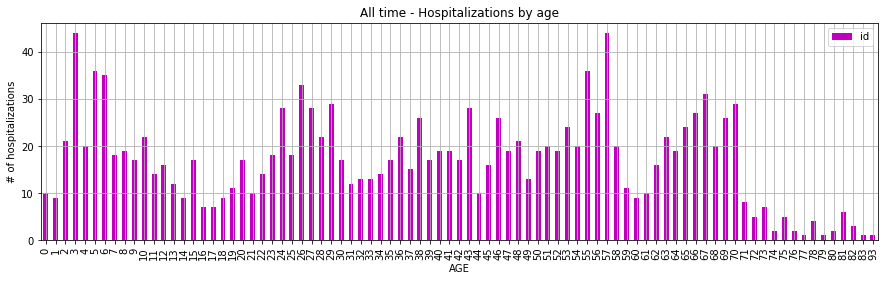

In [59]:
r = Hosp.groupby(['edad']).count()
r.sort_index(inplace=True)
r.drop(columns=['sexo','cod_diagnostico', 'dias_uci','dias_uce','dias_total','fe_ingreso','fe_egreso'], inplace=True)
r.head(30);
bars = r.plot.bar(color='m',figsize=(15, 4), grid=(True), title='All time - Hospitalizations by age')
bars.set_xlabel("AGE");
bars.set_ylabel("# of hospitalizations");

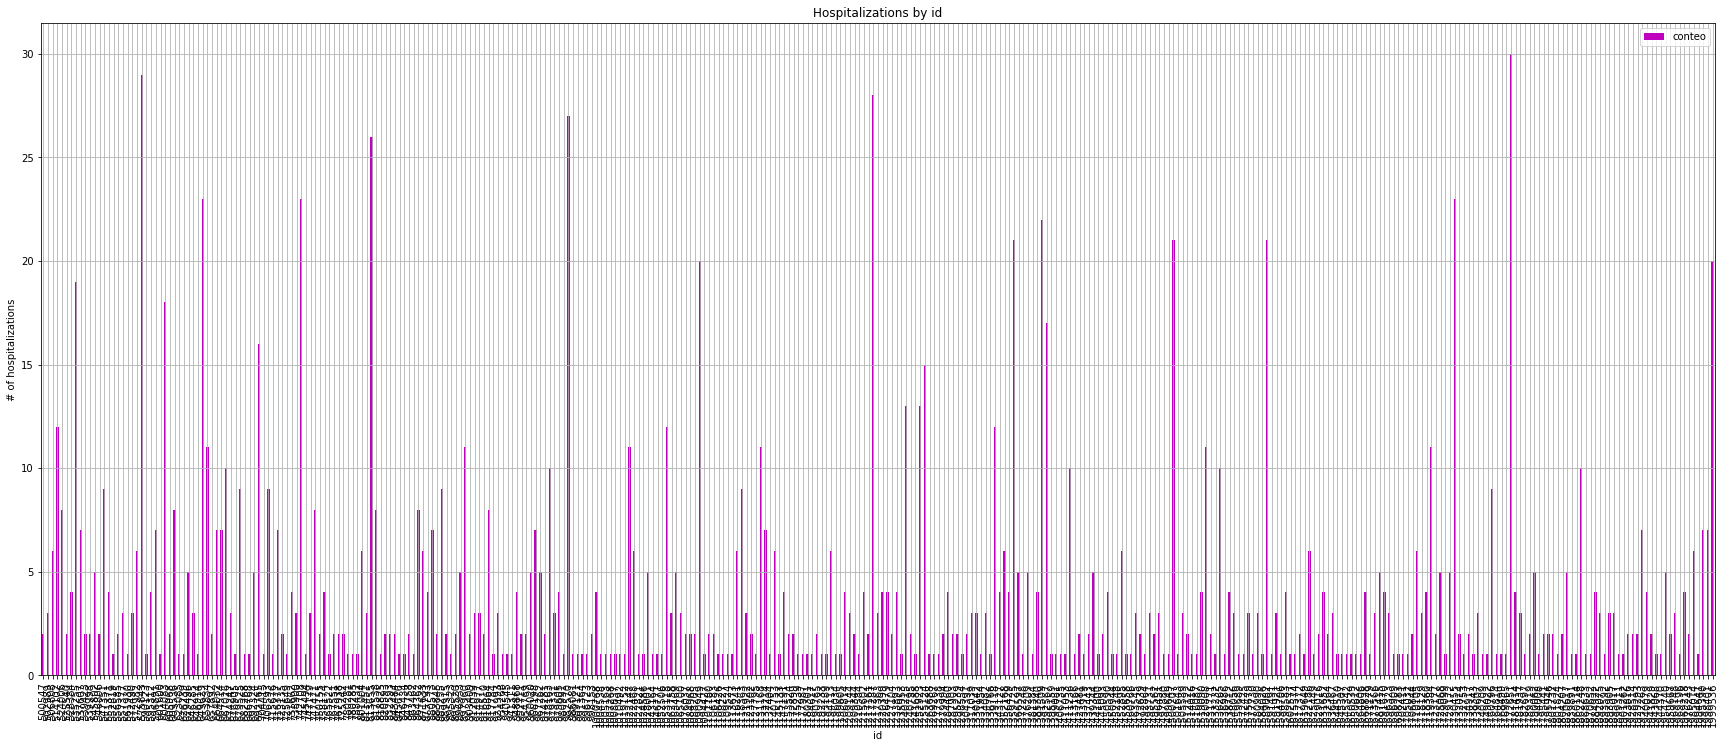

In [50]:
#Plot the number of hospitalizations per patient.
r1 = Hosp.groupby(['id']).count()
r1.sort_index(inplace=True)
r1.drop(columns=['sexo','cod_diagnostico', 'dias_uci','dias_uce','dias_total','fe_ingreso','fe_egreso'], inplace=True)
r1.rename(columns={'edad':'conteo'}, inplace=True)
r1.head(30);
bars1 = r1.plot.bar(color='m',figsize=(30, 12), grid=(True), title='Hospitalizations by id')
bars1.set_xlabel("id");
bars1.set_ylabel("# of hospitalizations");

I can see that just a few patients (5) have been hospitalized over 25 times each, these patients comprise the majority of hospitalizations. Meanwhile other patients have just been hospitalized once or twice.

In [40]:
r1.reset_index(inplace=True)

In [41]:
# Basic statistics on number of hospitalizations per patient.
print('Basic statistics: \n',r1['conteo'].describe())
print('Mode: \n',r1['conteo'].mode())

Basic statistics: 
 count    357.000000
mean       4.047619
std        5.102927
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       30.000000
Name: conteo, dtype: float64
Mode: 
 0    1
dtype: int64


In [42]:
# Total hospitalizations by gender.
r2 = Hosp.groupby(['sexo']).count()
r2.drop(columns=['cod_diagnostico', 'dias_uci','dias_uce','dias_total','fe_ingreso','fe_egreso','edad'], inplace=True)
r2

,id
sexo,
Femenino,1077
Masculino,368


In [43]:
Hosp
print('Hosp:\n', Hosp['cod_diagnostico'].value_counts().head(10))
print('Pato:\n', Pato['cod_diagnostico'].value_counts().head(10))

Hosp:
 J459    290
J46X    189
J189     87
J441     67
J159     38
N390     33
J180     31
J450     30
O800     23
E840     22
Name: cod_diagnostico, dtype: int64
Pato:
 J450    386
J459    291
L509    155
I10X     79
J304     72
L501     69
L500     68
L508     65
J449     49
J458     42
Name: cod_diagnostico, dtype: int64


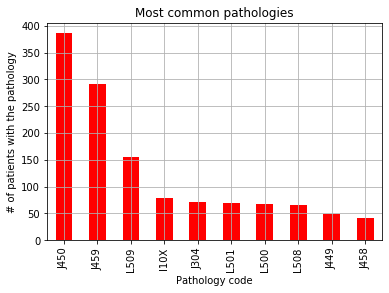

In [56]:
patoplot = Pato['cod_diagnostico'].value_counts().head(10)
patoplot = patoplot.plot.bar(color='r', grid=(True), title='Most common pathologies');
patoplot.set_xlabel("Pathology code");
patoplot.set_ylabel("# of patients with the pathology");

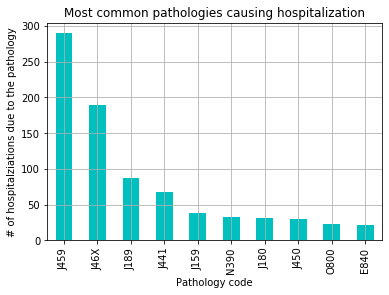

In [57]:
Hospplot = Hosp['cod_diagnostico'].value_counts().head(10)
Hospplot = Hospplot.plot.bar(color='c', grid=(True), title='Most common pathologies causing hospitalization');
Hospplot.set_xlabel("Pathology code");
Hospplot.set_ylabel("# of hospitalziations due to the pathology");